In [2]:
# 노이즈가 추가된 데이터셋
import numpy as np

np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10

In [3]:
# 회귀 트리 모형
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(max_depth=2, random_state=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=10)

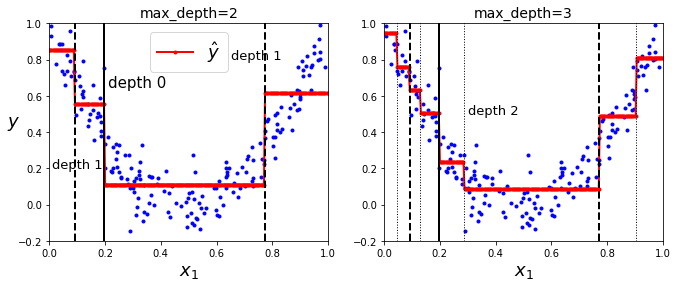

In [10]:
# 소스 복사
import matplotlib.pyplot as plt

tree_reg1=DecisionTreeRegressor(random_state=10, max_depth=2)
tree_reg2=DecisionTreeRegressor(random_state=10, max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0,2,-0.2,1], ylabel='$y$'):
    x1=np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    y_pred=tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r'$\hat{y}$')

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21,0.65,'depth 0', fontsize=15)
plt.text(0.01,0.2,'depth 1', fontsize=13)
plt.text(0.65,0.8,'depth 1', fontsize=13)
plt.xlim([0, 1.0])
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)
plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)
plt.text(0.3,0.5,'depth 2', fontsize=13)
plt.xlim([0, 1.0])
plt.title("max_depth=3", fontsize=14)

plt.show()